<a href="https://colab.research.google.com/github/sahilr005/ml/blob/main/Hospital_stay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

##### Task 1:- Prepare a complete data analysis report on the given data.
##### Task 2:- Create a machine learning model to predict the length of stay (in days) of apatient entering the Hospital, given various factors about their stay.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("HealthCareAnalytics.csv")
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [ ]:
data.shape

(92662, 18)

In [ ]:
data.isnull().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed_Grade                             23
patientid                              0
City_Code_Patient                    922
Type_of_Admission                      0
Severity_of_Illness                    0
Visitors_with_Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   1
dtype: int64

In [ ]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,92662.000000,92662.000000,92662.000000,92662.000000,92639.000000,92662.000000,91740.000000,92662.000000,92662.000000
mean,46331.500000,18.750113,4.799454,3.153839,2.618379,66028.750772,6.931273,3.233645,4939.382983
std,26749.359659,8.616642,3.109410,1.144581,0.853400,38016.985430,4.390373,1.733747,1055.633882
min,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,52.000000
25%,23166.250000,11.000000,2.000000,2.000000,2.000000,32995.000000,4.000000,2.000000,4265.000000
50%,46331.500000,20.000000,5.000000,3.000000,3.000000,66305.000000,8.000000,3.000000,4812.000000
75%,69496.750000,26.000000,7.000000,4.000000,3.000000,98793.000000,8.000000,4.000000,5457.000000
max,92662.000000,32.000000,13.000000,20.000000,4.000000,131604.000000,37.000000,32.000000,10999.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92662 entries, 0 to 92661
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            92662 non-null  int64  
 1   Hospital_code                      92662 non-null  int64  
 2   Hospital_type_code                 92662 non-null  object 
 3   City_Code_Hospital                 92662 non-null  int64  
 4   Hospital_region_code               92662 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  92662 non-null  int64  
 6   Department                         92662 non-null  object 
 7   Ward_Type                          92662 non-null  object 
 8   Ward_Facility_Code                 92662 non-null  object 
 9   Bed_Grade                          92639 non-null  float64
 10  patientid                          92662 non-null  int64  
 11  City_Code_Patient                  91740 non-null  flo

In [ ]:
object_data = []
for i in data.columns:
    if data[i].dtype=="O":
        object_data.append(i)
        
object_data

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type_of_Admission',
 'Severity_of_Illness',
 'Age',
 'Stay']

Text(0.5, 1.0, 'Hospital_type_code')

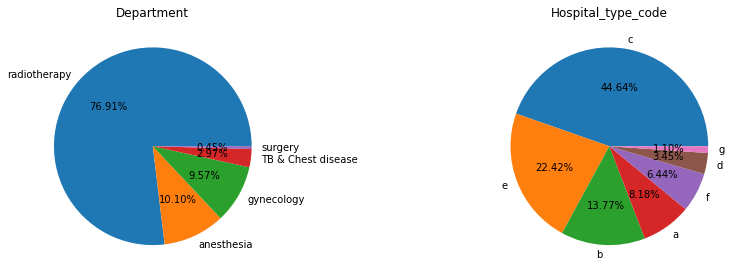

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.pie(data["Department"].value_counts(),autopct="%0.2f%%",labels=data["Department"].unique())
plt.title("Department")

ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(data["Hospital_type_code"].value_counts(),autopct="%0.2f%%",labels=data["Hospital_type_code"].unique())
plt.title("Hospital_type_code")

Text(0.5, 1.0, 'Age')

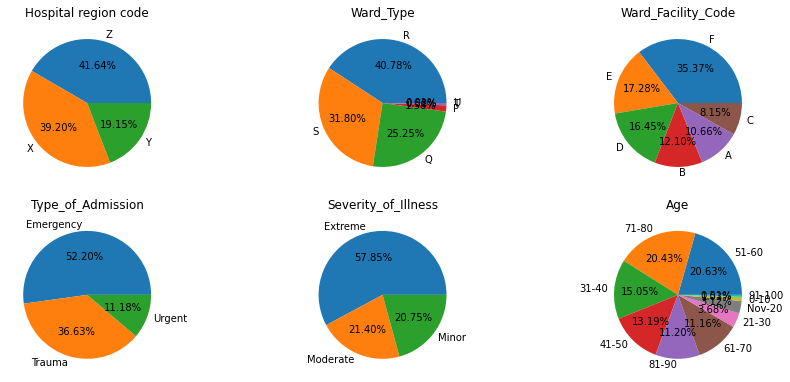

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((3,3), (0, 0))
plt.pie(data["Hospital_region_code"].value_counts(),autopct="%0.2f%%",labels=data["Hospital_region_code"].unique())
plt.title("Hospital region code")

ax1 = plt.subplot2grid((3,3), (0, 1))
plt.pie(data["Ward_Type"].value_counts(),autopct="%0.2f%%",labels=data["Ward_Type"].unique())
plt.title("Ward_Type")

ax1 = plt.subplot2grid((3,3), (0, 2))
plt.pie(data["Ward_Facility_Code"].value_counts(),autopct="%0.2f%%",labels=data["Ward_Facility_Code"].unique())
plt.title("Ward_Facility_Code")

ax1 = plt.subplot2grid((3,3), (1, 0))
plt.pie(data["Type_of_Admission"].value_counts(),autopct="%0.2f%%",labels=data["Type_of_Admission"].unique())
plt.title("Type_of_Admission")

ax1 = plt.subplot2grid((3,3), (1, 1))
plt.pie(data["Severity_of_Illness"].dropna().value_counts(),autopct="%0.2f%%",labels=data["Severity_of_Illness"].dropna().unique())
plt.title("Severity_of_Illness")

ax1 = plt.subplot2grid((3,3), (1, 2))
plt.pie(data["Age"].dropna().value_counts(),autopct="%0.2f%%",labels=data["Age"].dropna().unique())
plt.title("Age")

Text(0.5, 1.0, 'How many day stay')

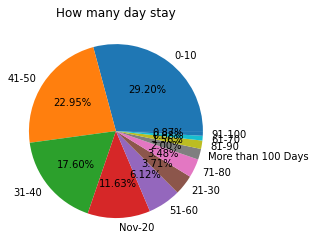

In [ ]:
plt.pie(data["Stay"].dropna().value_counts(),autopct="%0.2f%%",labels=data["Stay"].dropna().unique())
plt.title("How many day stay")

- 27% patient recover between 10 days
- 24% patient recover between 40-50 days

In [ ]:
data.isnull().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed_Grade                             23
patientid                              0
City_Code_Patient                    922
Type_of_Admission                      0
Severity_of_Illness                    0
Visitors_with_Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   1
dtype: int64

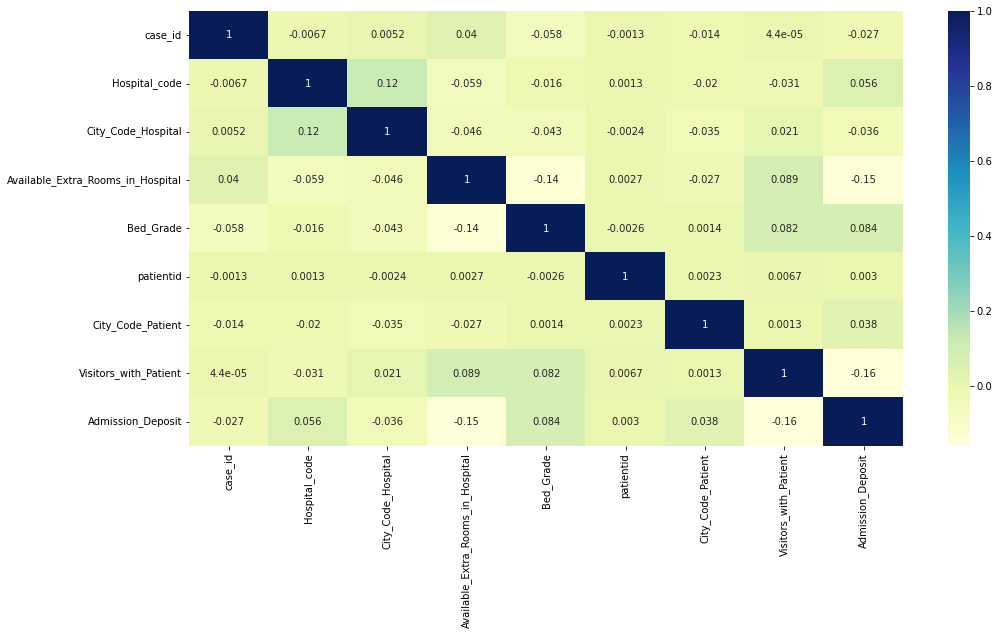

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(ax=ax, data=data.corr(), cmap="YlGnBu", annot=True)

## FEATURE SELECTION

In [ ]:
# data2 = data[["Hospital_type_code","Hospital_region_code","Department","Ward_Type","Ward_Facility_Code","Bed_Grade","Type_of_Admission","Severity_of_Illness","Age","Stay","Admission_Deposit","Visitors_with_Patient",]]
data2 = data.drop(["case_id","Hospital_code","patientid"],axis=1)

In [ ]:
data2.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import make_pipeline,Pipeline

In [ ]:
h_c = LabelEncoder().fit(data2["Hospital_type_code"])
hrc = LabelEncoder().fit(data2["Hospital_region_code"])
dp  = LabelEncoder().fit(data2["Department"])
wd  = LabelEncoder().fit(data2["Ward_Type"])
wfc = LabelEncoder().fit(data2["Ward_Facility_Code"])
ta  = LabelEncoder().fit(data2["Type_of_Admission"])
si  = LabelEncoder().fit(data2["Severity_of_Illness"])
age = LabelEncoder().fit(data2["Age"])
stay = LabelEncoder().fit(data2["Stay"])

data2["Hospital_type_code"] = h_c.transform(data2["Hospital_type_code"])
data2["Hospital_region_code"] = hrc.fit_transform(data2["Hospital_region_code"])
data2["Department"] = dp.fit_transform(data2["Department"])
data2["Ward_Type"] = wd.fit_transform(data2["Ward_Type"])
data2["Ward_Facility_Code"] = wfc.fit_transform(data2["Ward_Facility_Code"])
data2["Type_of_Admission"] = ta.fit_transform(data2["Type_of_Admission"])
data2["Severity_of_Illness"] = si.fit_transform(data2["Severity_of_Illness"])
data2["Age"] = age.fit_transform(data2["Age"])
data2["Stay"] = stay.fit_transform(data2["Stay"])

<Figure size 1080x360 with 0 Axes>

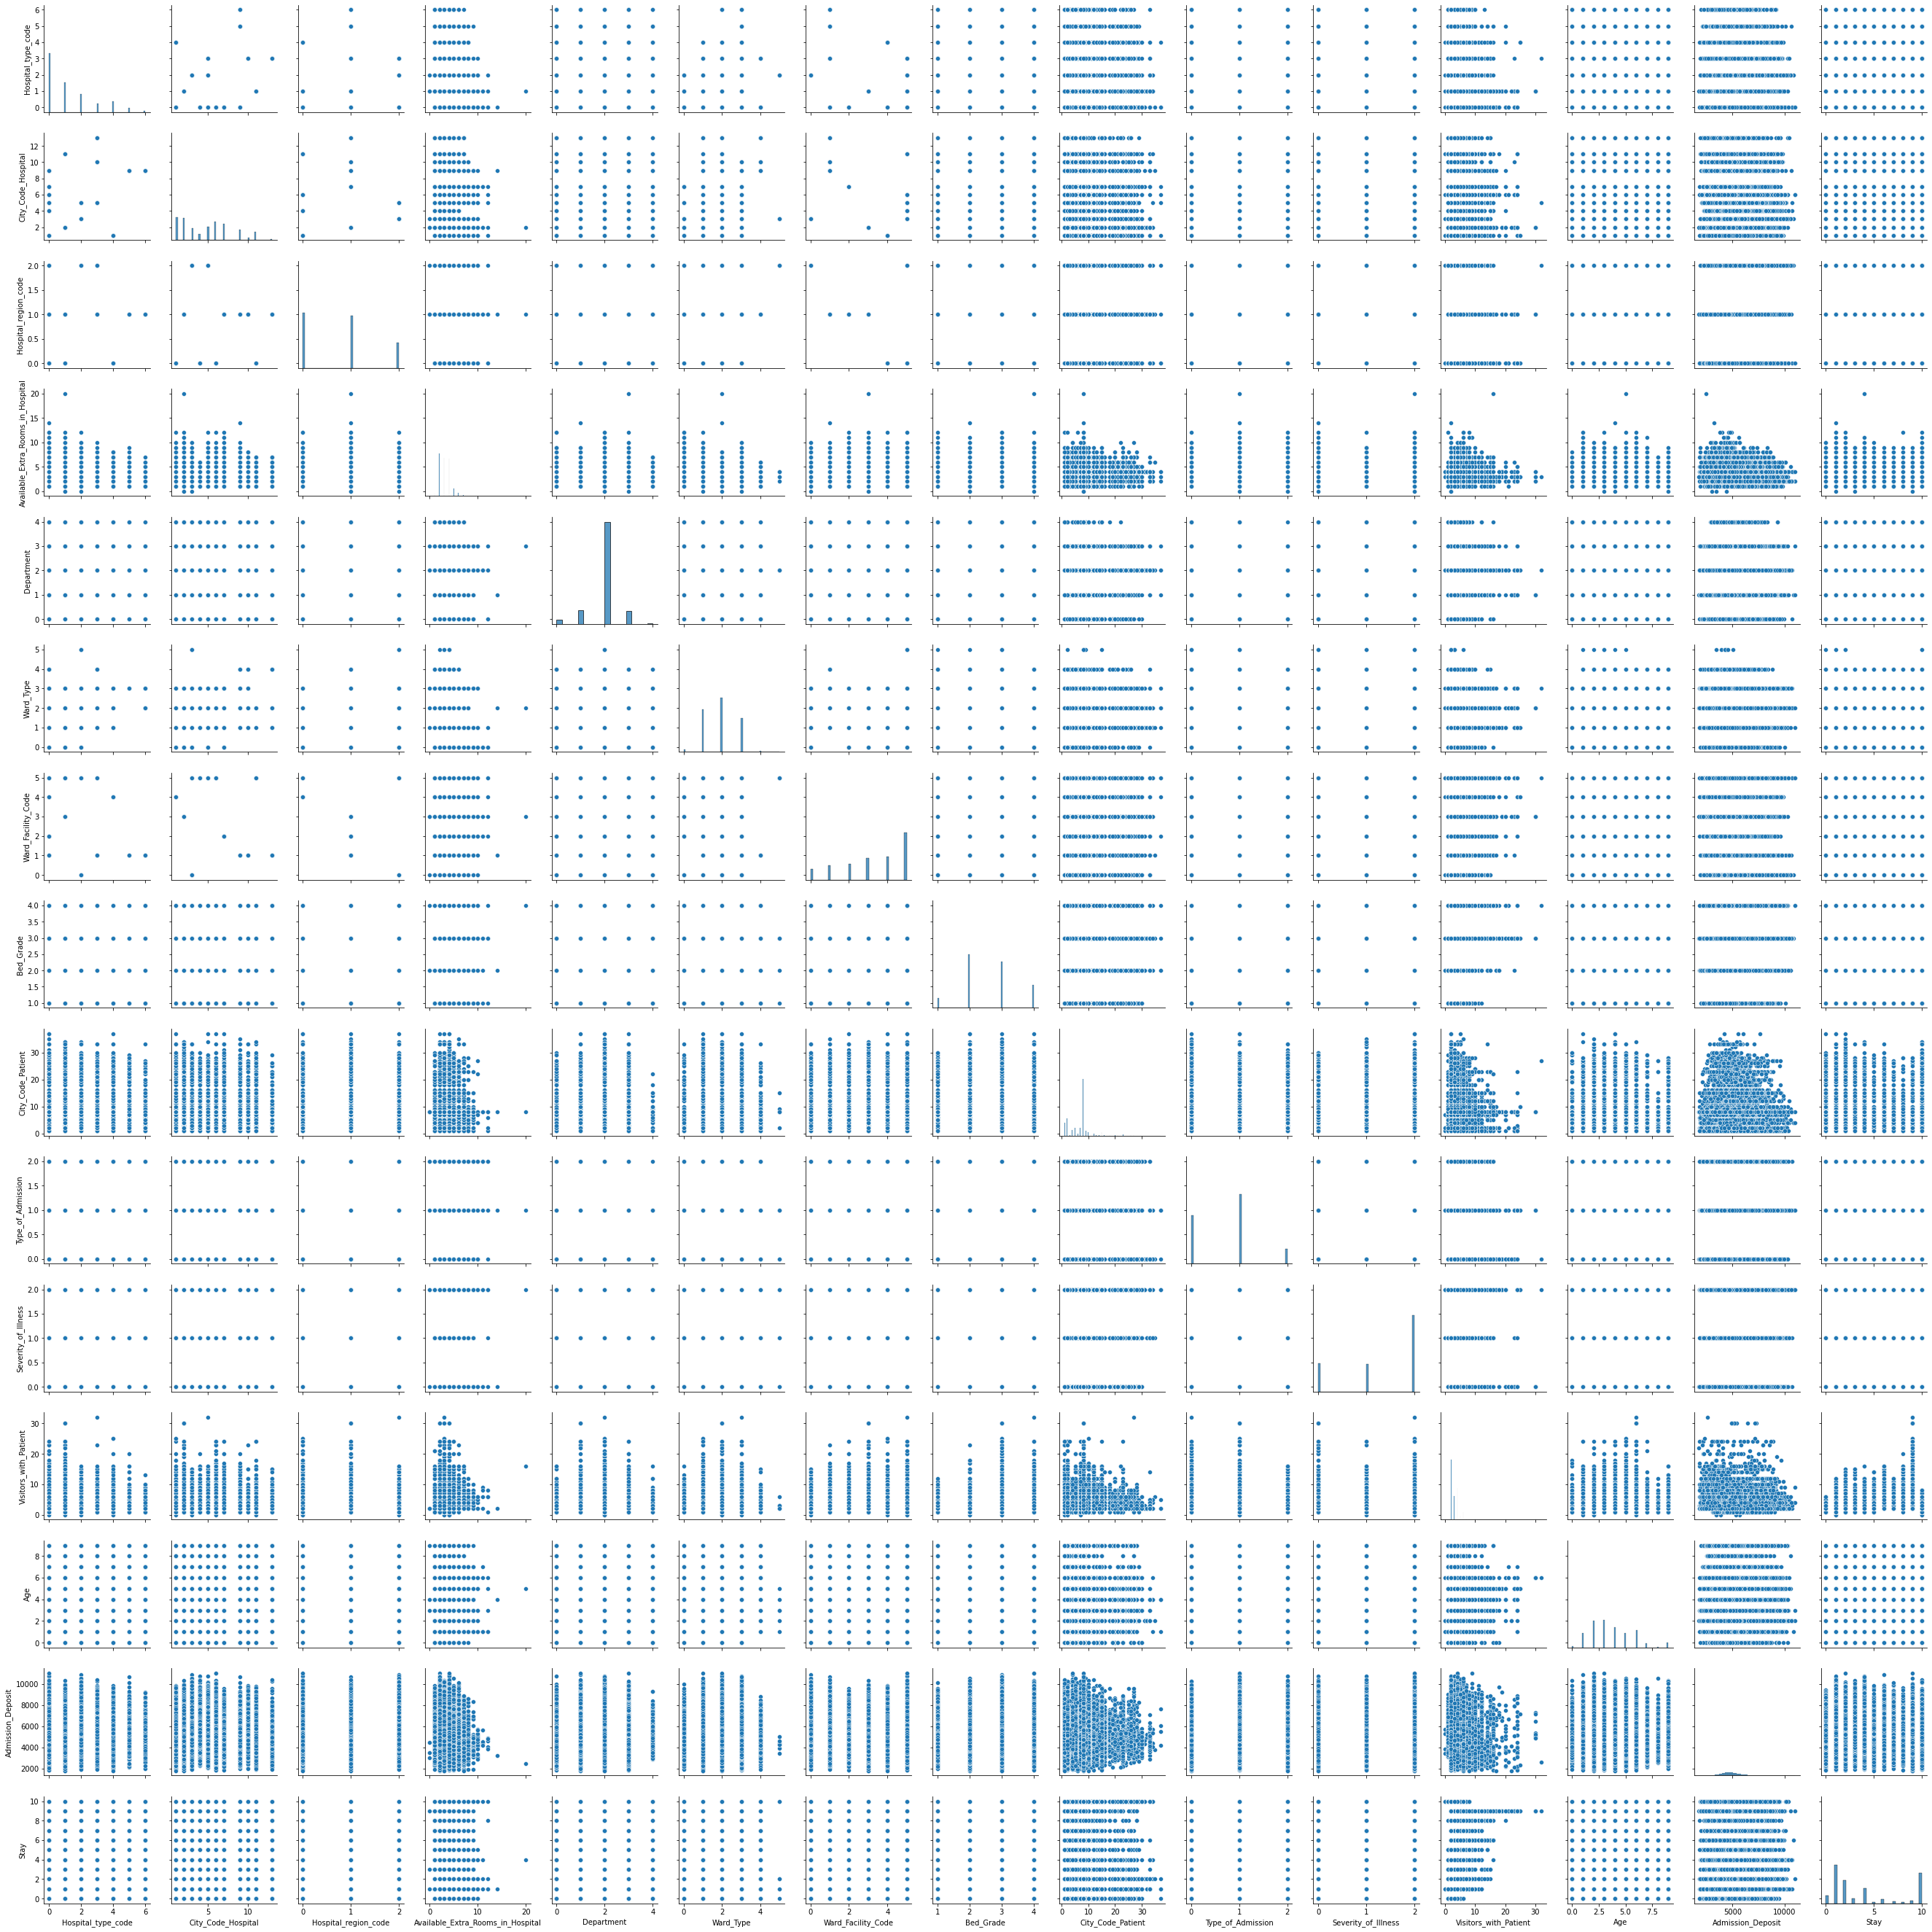

In [ ]:
plt.figure(figsize=(15,5))
sns.pairplot(data=data2)


In [ ]:
x = data2.drop(["Stay"],axis=1)
y = data2["Stay"]

## Model Building

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3)

In [ ]:
model_name = []
train_score = []
test_score = []

def model_run(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  tr_score = model.score(x_train,y_train)
  te_score =  accuracy_score(y_test,y_pred)
  model_name.append(model)
  train_score.append(tr_score)
  test_score.append(te_score)
  print(model)
  print("Train Score",tr_score)
  print("Accuracy Score",te_score)
  print("=====================================")


In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
rd = RandomForestClassifier()
rid = RidgeClassifier()
dec = DecisionTreeClassifier()
ex = ExtraTreeClassifier()
his = HistGradientBoostingClassifier()
ad = AdaBoostClassifier()
kn = KNeighborsClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

models = [rd,rid,dec,ex,his,ad,kn,bnb,gnb,mnb]
for i in models:
  model_run(i)

RandomForestClassifier()
Train Score 0.9997975109421972
Accuracy Score 0.3863710703252771
RidgeClassifier()
Train Score 0.35625613308203924
Accuracy Score 0.3535526076685444
DecisionTreeClassifier()
Train Score 0.9997975109421972
Accuracy Score 0.3023078320915864
ExtraTreeClassifier()
Train Score 0.9997975109421972
Accuracy Score 0.28322733054697435
HistGradientBoostingClassifier()
Train Score 0.4910826934159904
Accuracy Score 0.4239869162275123
AdaBoostClassifier()
Train Score 0.3836388841295307
Accuracy Score 0.3795020897692168
KNeighborsClassifier()
Train Score 0.4820952944658183
Accuracy Score 0.26414682900236236
BernoulliNB()
Train Score 0.3002912727216087
Accuracy Score 0.29667454115936764
GaussianNB()
Train Score 0.3710845625457547
Accuracy Score 0.3707068871524623
MultinomialNB()
Train Score 0.33789193314745875
Accuracy Score 0.3362892967472288


### Model Report

In [ ]:
model_report = pd.DataFrame([model_name,train_score,test_score]).T
model_report.columns = ["Model","Train Score","Test Score"]

In [ ]:
model_report.sort_values("Test Score",ascending=False).reset_index(drop=True)

,Model,Train Score,Test Score
0,HistGradientBoostingClassifier(),0.491083,0.423987
1,"(DecisionTreeClassifier(max_features='auto', r...",0.999798,0.386371
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.383639,0.379502
3,GaussianNB(),0.371085,0.370707
4,RidgeClassifier(),0.356256,0.353553
5,MultinomialNB(),0.337892,0.336289
6,DecisionTreeClassifier(),0.999798,0.302308
7,BernoulliNB(),0.300291,0.296675
8,ExtraTreeClassifier(),0.999798,0.283227
9,KNeighborsClassifier(),0.482095,0.264147


- In HistGradientBoosting achieve best traing & test score
- HistGradientBoosting :- Histogram-based Gradient Boosting Classification Tree, is much faster than GradientBoostingClassifier